# 📊 Telecom X – Análisis de Evasión de Clientes

**Autora:** Betty  
**Desafío:** Alura LATAM - Data Science  
**Objetivo:** Analizar los datos de clientes de Telecom X para detectar patrones relacionados con la cancelación del servicio (_churn_).

---

### 🔍 Etapas del análisis:
1. Carga y exploración inicial de los datos  
2. Limpieza y transformación  
3. Análisis exploratorio por variables  
4. Visualización de insights  
5. Conclusiones y recomendaciones


In [7]:
# Importar librerías y cargar datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Cargar los datos desde la fuente oficial
url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"
response = requests.get(url)

# Verificar que la solicitud fue exitosa (código 200)
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    print(df.head())
else:
    print(f"Error al obtener los datos: {response.status_code}")
#url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/data/telecom_users.csv"
#df = pd.read_csv(url)

# Mostrar primeras filas
df.head()


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 🧹 Limpieza y preparación de datos

Eliminamos columnas innecesarias, convertimos datos a formato numérico y tratamos valores faltantes para asegurar que el análisis sea fiable.


In [15]:
# Flatten the nested dictionaries into new columns
df = pd.json_normalize(data)



# Eliminar filas con datos faltantes
df.dropna(how="any", inplace=True)
df.reset_index(drop=True, inplace=True)

# Verificamos el estado final del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Análisis general de cancelaciones
## 📉 ¿Cuál es la proporción de cancelaciones?

Veamos cuántos clientes siguen activos y cuántos han cancelado el servicio.


/tmp/ipython-input-16-49286271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Set2")


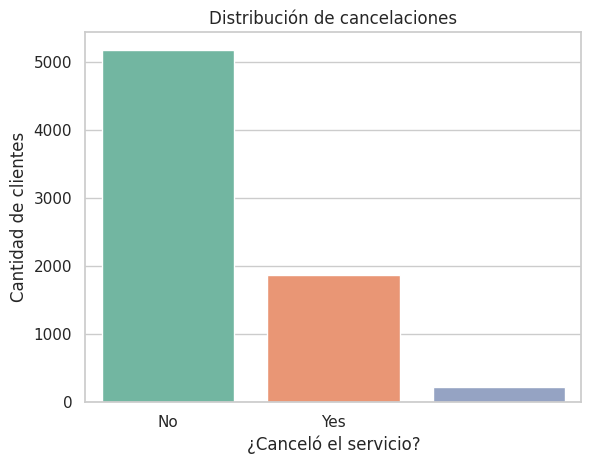

In [16]:
# Distribucion de cancelaciones
sns.countplot(data=df, x="Churn", palette="Set2")
plt.title("Distribución de cancelaciones")
plt.xlabel("¿Canceló el servicio?")
plt.ylabel("Cantidad de clientes")
plt.show()


# Análisis por variable: Contrato
## 📑 ¿Influye el tipo de contrato en las cancelaciones?

Veamos si los contratos mensuales tienen mayor proporción de _churn_ que los otros tipos.


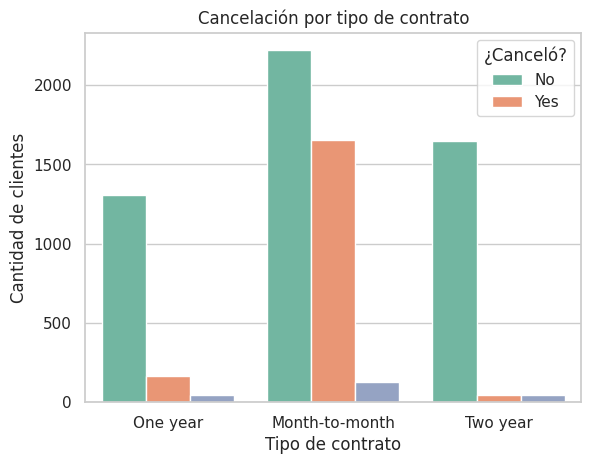

In [18]:
sns.countplot(data=df, x="account.Contract", hue="Churn", palette="Set2")
plt.title("Cancelación por tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.legend(title="¿Canceló?")
plt.show()

# Análisis por forma de pago
### 💳 ¿La forma de pago influye en las cancelaciones?

Analizamos si los clientes que pagan con boleto (factura) tienden a cancelar más que quienes usan tarjeta o débito automático.


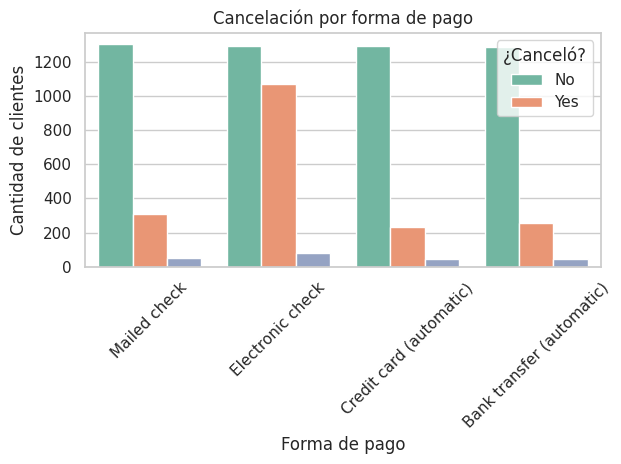

In [21]:
sns.countplot(data=df, x="account.PaymentMethod", hue="Churn", palette="Set2")
plt.title("Cancelación por forma de pago")
plt.xlabel("Forma de pago")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=45)
plt.legend(title="¿Canceló?")
plt.tight_layout()
plt.show()

# Análisis por servicios adicionales
## 🔐 ¿Los servicios adicionales influyen en el churn?

Exploramos si tener servicios como Seguridad Online, Backup Online o Soporte Técnico reduce la probabilidad de cancelación.


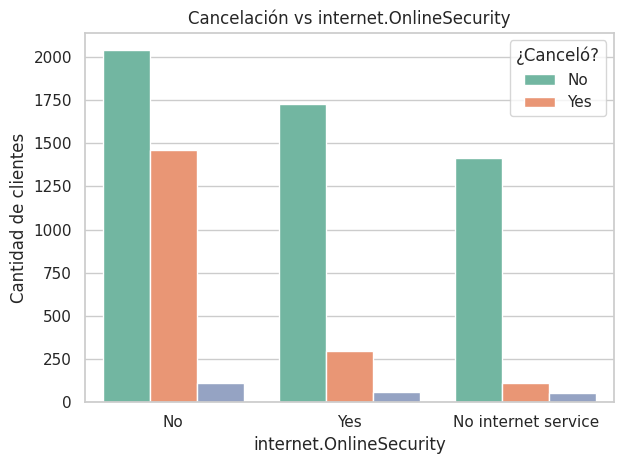

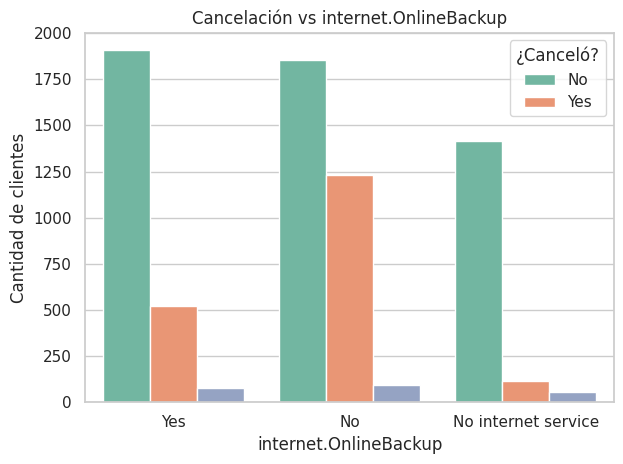

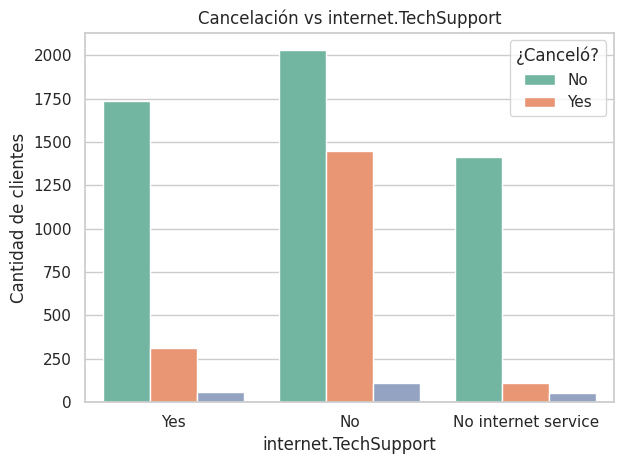

In [23]:
# Grafico de varios servicios
servicios = ["internet.OnlineSecurity", "internet.OnlineBackup", "internet.TechSupport"]

for servicio in servicios:
    sns.countplot(data=df, x=servicio, hue="Churn", palette="Set2")
    plt.title(f"Cancelación vs {servicio}")
    plt.xlabel(servicio)
    plt.ylabel("Cantidad de clientes")
    plt.legend(title="¿Canceló?")
    plt.tight_layout()
    plt.show()

# Analisis por antiguedad
## 🕒 ¿Influye el tiempo de contrato en la cancelación?

Veamos si los clientes que están más tiempo en la empresa tienen menos probabilidad de cancelar.


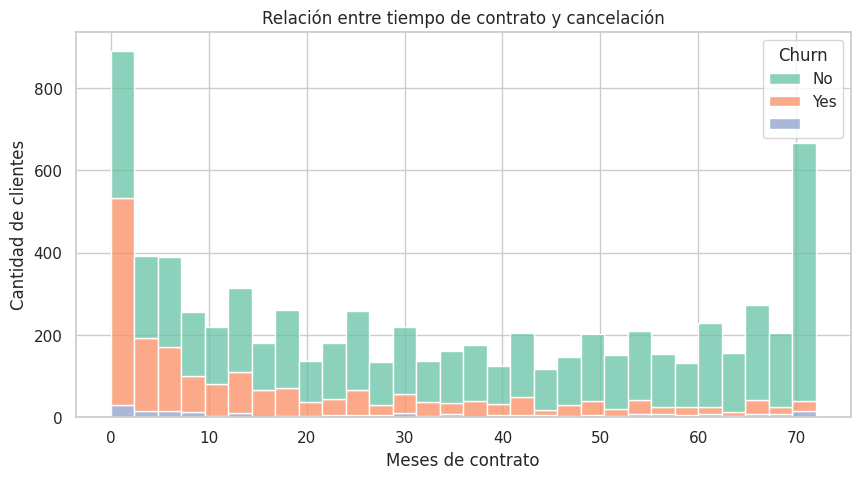

In [25]:
# Grafica de tiempo de contrato
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="customer.tenure", hue="Churn", multiple="stack", palette="Set2", bins=30)
plt.title("Relación entre tiempo de contrato y cancelación")
plt.xlabel("Meses de contrato")
plt.ylabel("Cantidad de clientes")
plt.show()

# Análisis por género
## 🧍‍♀️ ¿El género influye en la decisión de cancelar?

Verificamos si hay diferencia en la tasa de cancelación entre hombres y mujeres.



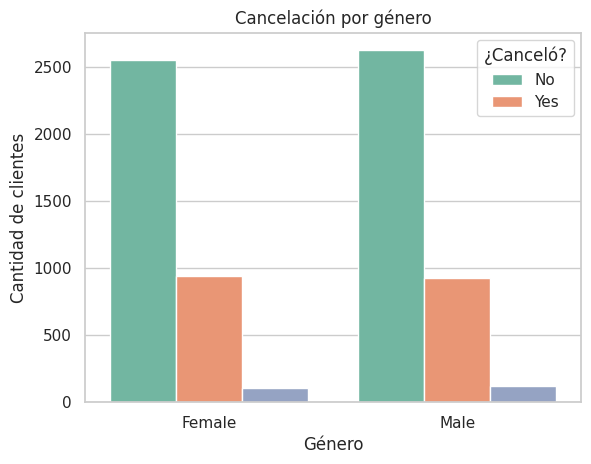

In [28]:
# Gráfico por género
sns.countplot(data=df, x="customer.gender", hue="Churn", palette="Set2")
plt.title("Cancelación por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.legend(title="¿Canceló?")
plt.show()

## ✅ Conclusiones finales

🔍 **Hallazgos principales:**

- 📉 Los contratos mensuales tienen mayor tasa de cancelación.
- 💸 El uso de boletos como forma de pago se asocia con mayor churn.
- 🧩 Los clientes que no contratan servicios adicionales (seguridad, soporte, backup) cancelan más.
- ⏳ A mayor antigüedad del contrato, menor la probabilidad de cancelar.
- 🧍 El género no parece tener una gran influencia en la cancelación.

---

📌 **Recomendaciones para Telecom X:**

1. Ofrecer descuentos por contratos anuales.
2. Promover servicios adicionales con campañas personalizadas.
3. Implementar débito automático con beneficios (descuentos o puntos).
4. Enfocar campañas de fidelización en clientes nuevos y de contratos mensuales.

---
